In [2]:
from torchvision import models, datasets, transforms,utils

In [21]:
#model 中包含的模型
list(filter(lambda x:False if x.startswith("__") else True, dir(models)))

['AlexNet',
 'DenseNet',
 'Inception3',
 'ResNet',
 'SqueezeNet',
 'VGG',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'inception',
 'inception_v3',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn']

In [23]:
#model 中包含的数据集
list(filter(lambda x:False if x.startswith("__") else True, dir(datasets)))

['CIFAR10',
 'CIFAR100',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'DatasetFolder',
 'EMNIST',
 'FakeData',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'ImageFolder',
 'KMNIST',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Omniglot',
 'PhotoTour',
 'SBU',
 'SEMEION',
 'STL10',
 'SVHN',
 'VOCDetection',
 'VOCSegmentation',
 'cifar',
 'cityscapes',
 'coco',
 'fakedata',
 'flickr',
 'folder',
 'lsun',
 'mnist',
 'omniglot',
 'phototour',
 'sbu',
 'semeion',
 'stl10',
 'svhn',
 'utils',
 'voc']

In [24]:
list(filter(lambda x:False if x.startswith("__") else True, dir(transforms)))

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'functional',
 'transforms']

In [25]:
list(filter(lambda x:False if x.startswith("__") else True, dir(utils)))

['irange', 'make_grid', 'math', 'save_image', 'torch']

In [38]:
#下载CIFIAR100数据集
dataset=datasets.CIFAR100('data/',download=True, train=True, transform=None)

Files already downloaded and verified


In [39]:
dataset

Dataset CIFAR100
    Number of datapoints: 50000
    Split: train
    Root Location: data/
    Transforms (if any): None
    Target Transforms (if any): None

In [44]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x208041790B8>, 19)

In [3]:
#进行相应的裁剪
transform=transforms.Compose([
    transforms.Resize(50), #缩放图片,保持长宽比不变，最短边为50像素
    transforms.CenterCrop(40), #从图片中间裁剪出32*32的图片
    transforms.ToTensor(), #将图片Image转换成Tensor，归一化至【0,1】
   # transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5])  #标准化至【-1,1】，规定均值和方差
])
#下载CIFIAR100数据集,指定transform进行数据预处理
dataset=datasets.CIFAR100('data/',download=True, train=True, transform=transform)
dataset[0][0].shape

Files already downloaded and verified


torch.Size([3, 40, 40])

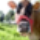

In [4]:
to_image = transforms.ToPILImage()
to_image(dataset[0][0])

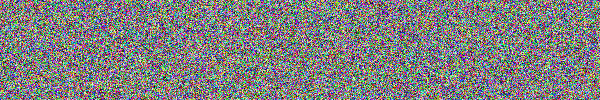

In [80]:
import torch
to_image(torch.randn(3,100,600))

Files already downloaded and verified


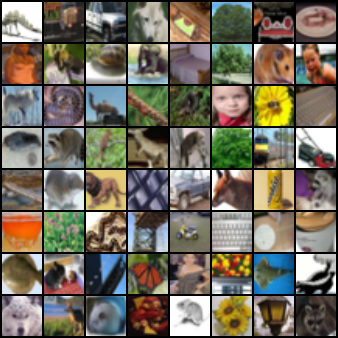

In [88]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid, save_image
transform=transforms.Compose([
    transforms.Resize(50), #缩放图片,保持长宽比不变，最短边为50像素
    transforms.CenterCrop(40), #从图片中间裁剪出32*32的图片
    transforms.ToTensor()#, #将图片Image转换成Tensor，归一化至【0,1】
    #transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5])  #标准化至【-1,1】，规定均值和方差
])
dataset=datasets.CIFAR100('data/',download=True, train=True, transform=transform)
dataloader=DataLoader(dataset,batch_size=64,shuffle=True)

dataiter=iter(dataloader)
img=make_grid(next(dataiter)[0],8)  #拼成4*4的网格图片，且会转成3通道。
to_image(img)

In [90]:
save_image(img,"cifar100_grid.png")